# QuickGuide for Image analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

In [ ]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 PyMuPDF
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U opencv-python pytube 
!pip install -U mkt-retv

## Env 세팅

In [1]:
from market_research.analysis import ImgAnalysis

## 준비

### 분석 폴더
- `input`에 파일을 넣어주세요.

In [2]:
ima = ImgAnalysis()

## Image 분석

In [4]:
image_list = ima.read_files_from_inputpath()
# image_list

[WindowsPath('input/elemental.png'),
 WindowsPath('input/spiderman1-1.png'),
 WindowsPath('input/spiderman1-2.png'),
 WindowsPath('input/spiderman2-1.png'),
 WindowsPath('input/spiderman2-2.png'),
 WindowsPath('input/spiderman2-3.png'),
 WindowsPath('input/spiderman2-4.png'),
 WindowsPath('input/spiderman2-5.png'),
 WindowsPath('input/spiderman2-6.png'),
 WindowsPath('input/spiderman2-7.png'),
 WindowsPath('input/spiderman2-8.png'),
 WindowsPath('input/spiderman2-9.png')]

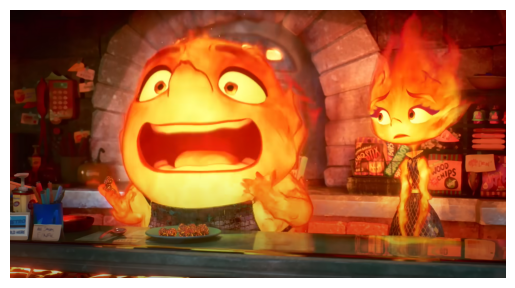

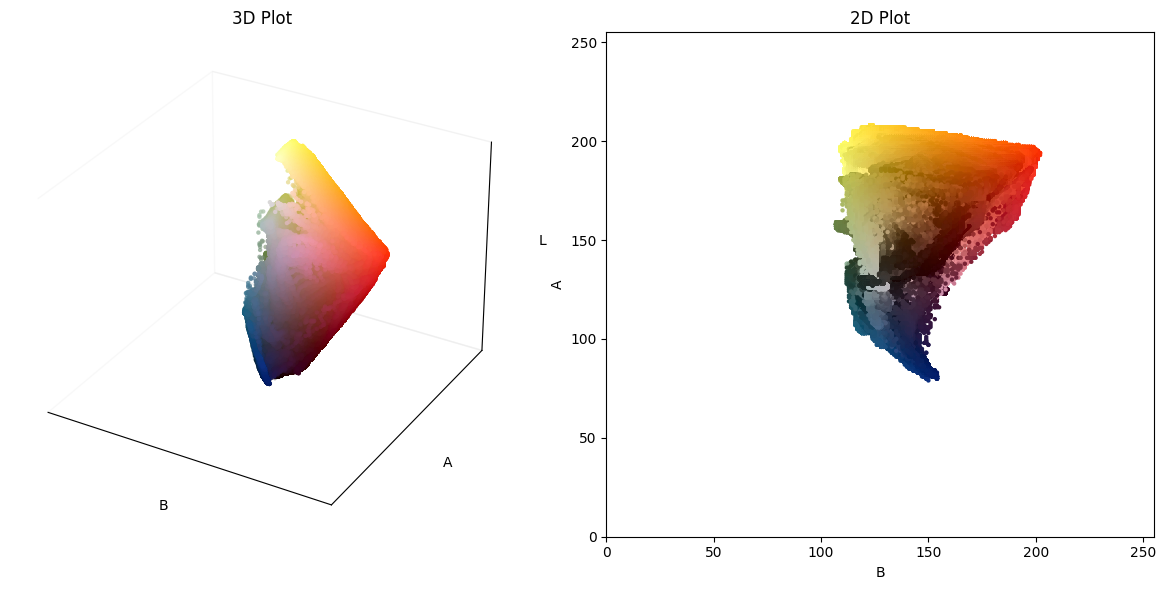

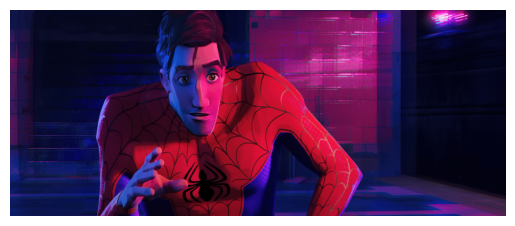

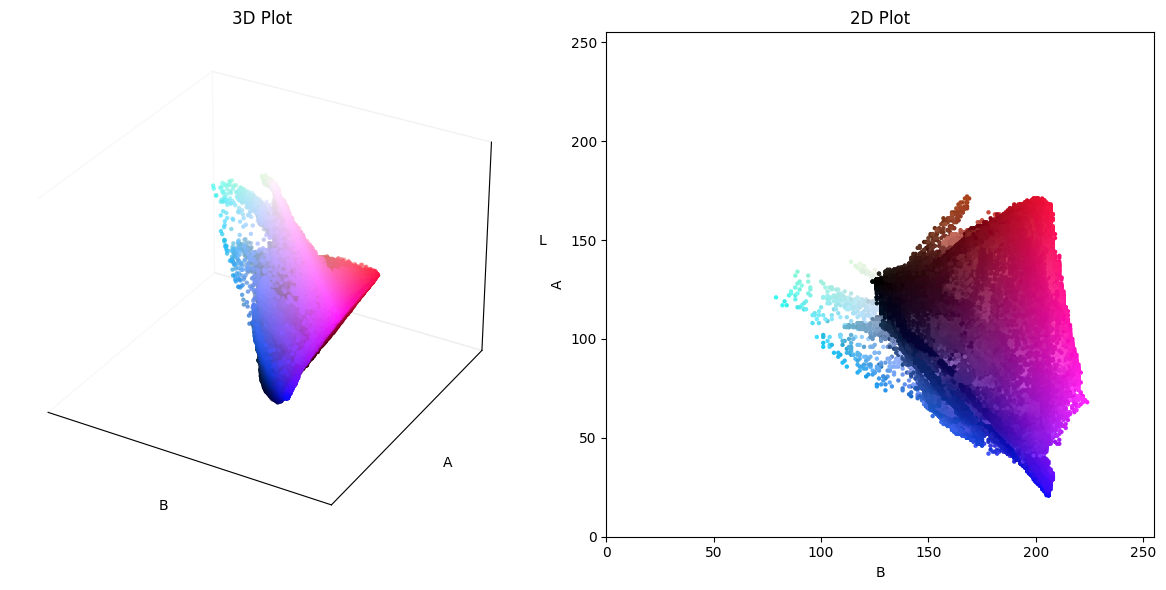

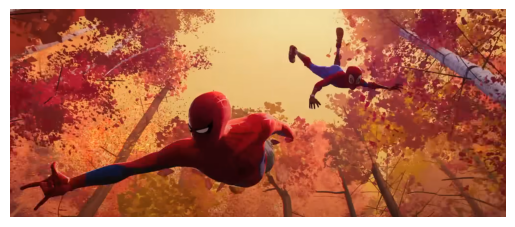

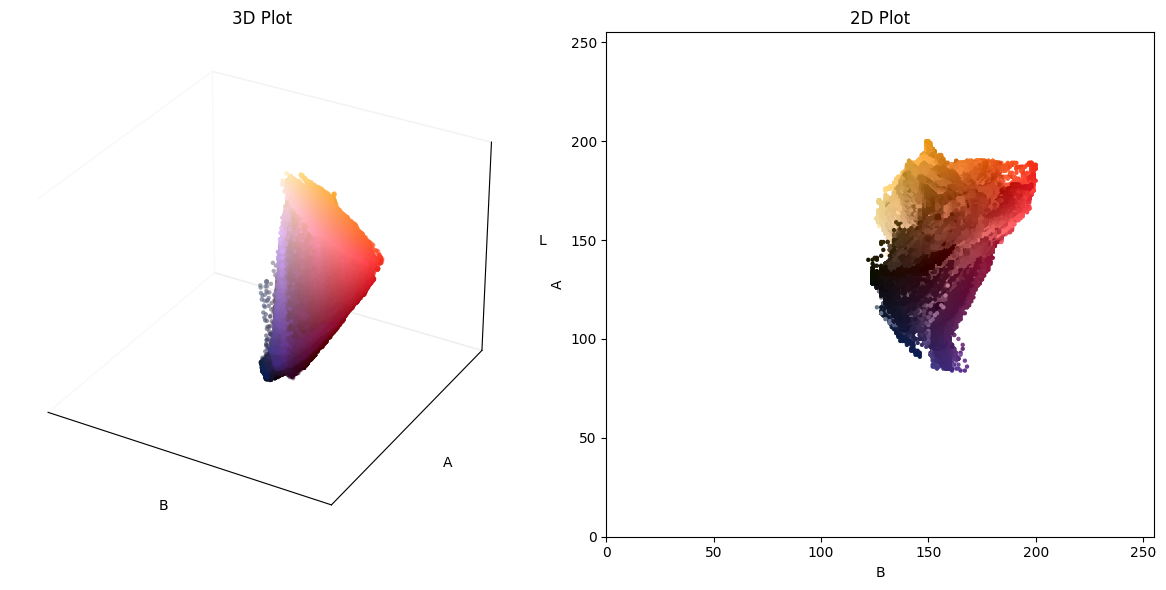

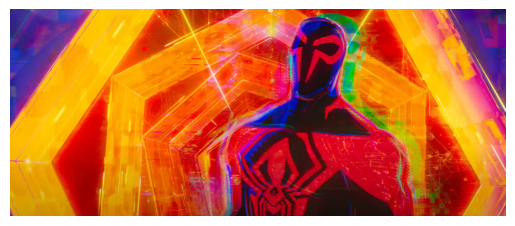

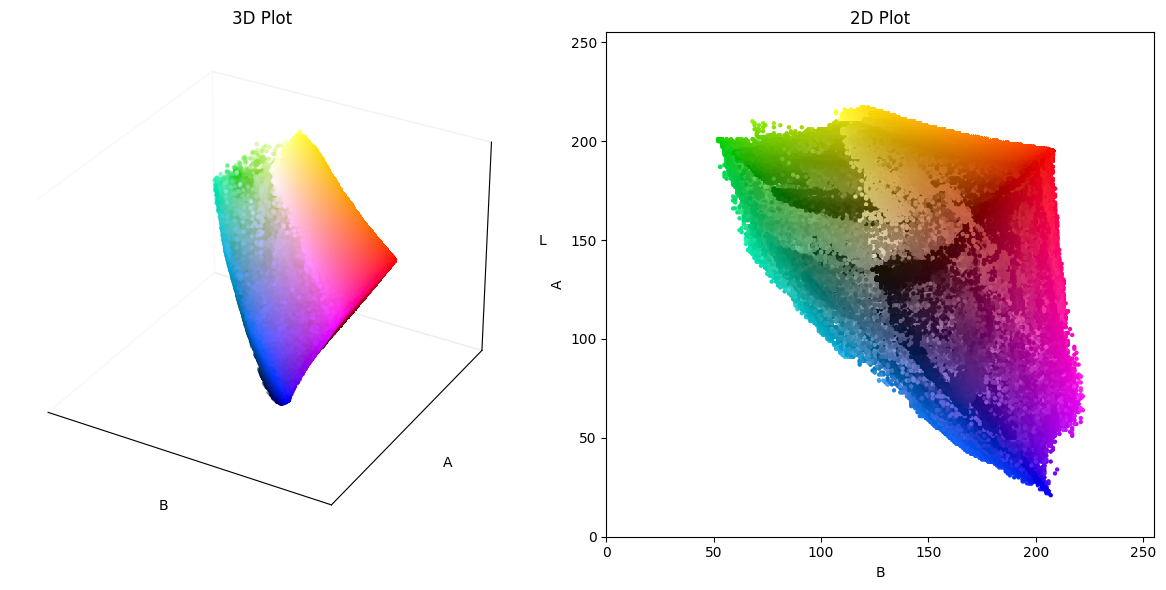

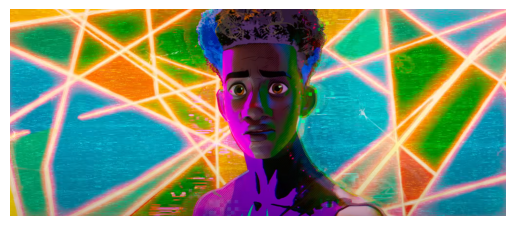

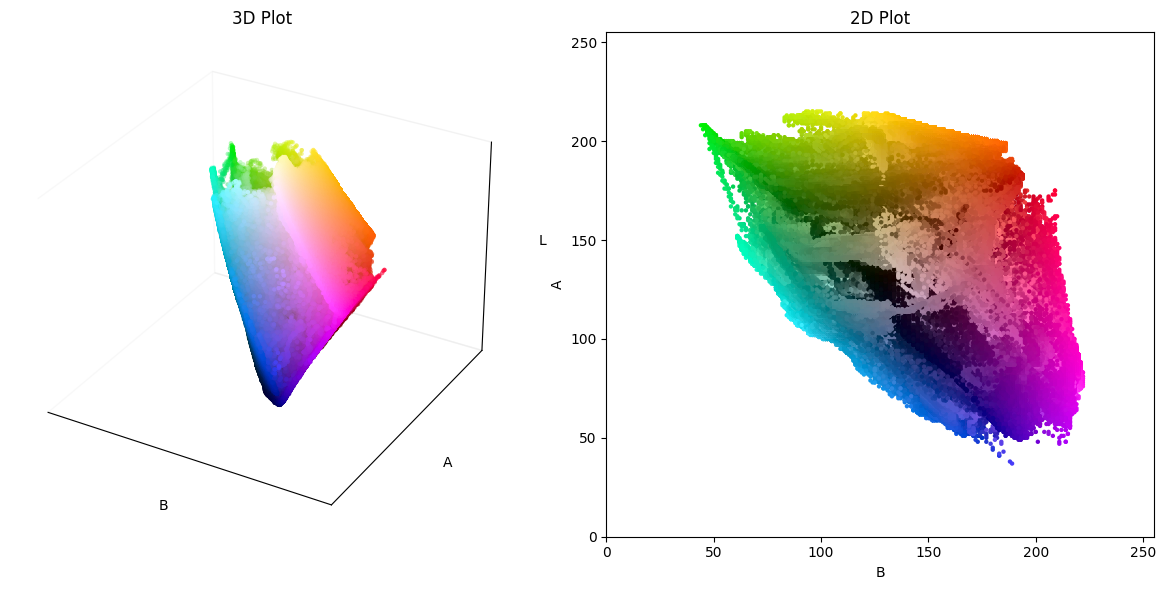

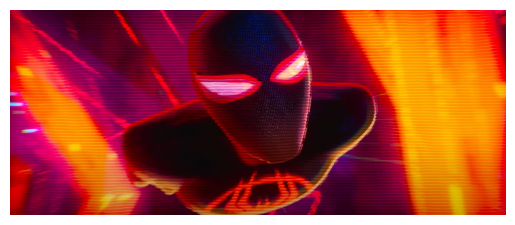

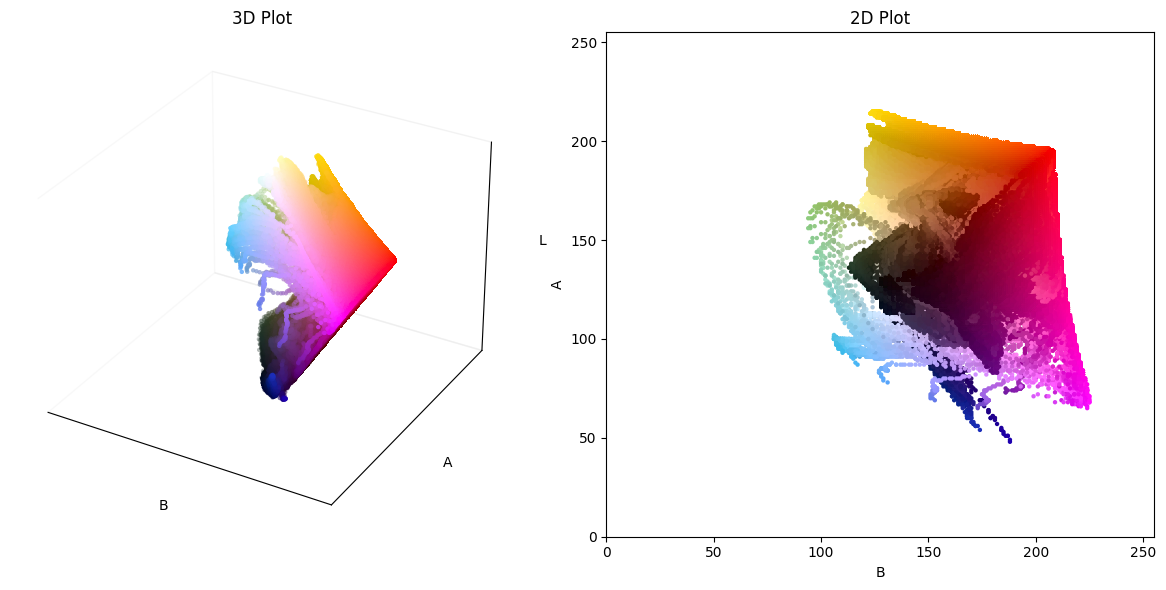

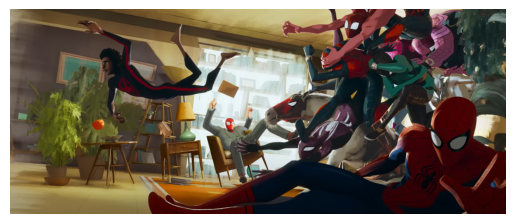

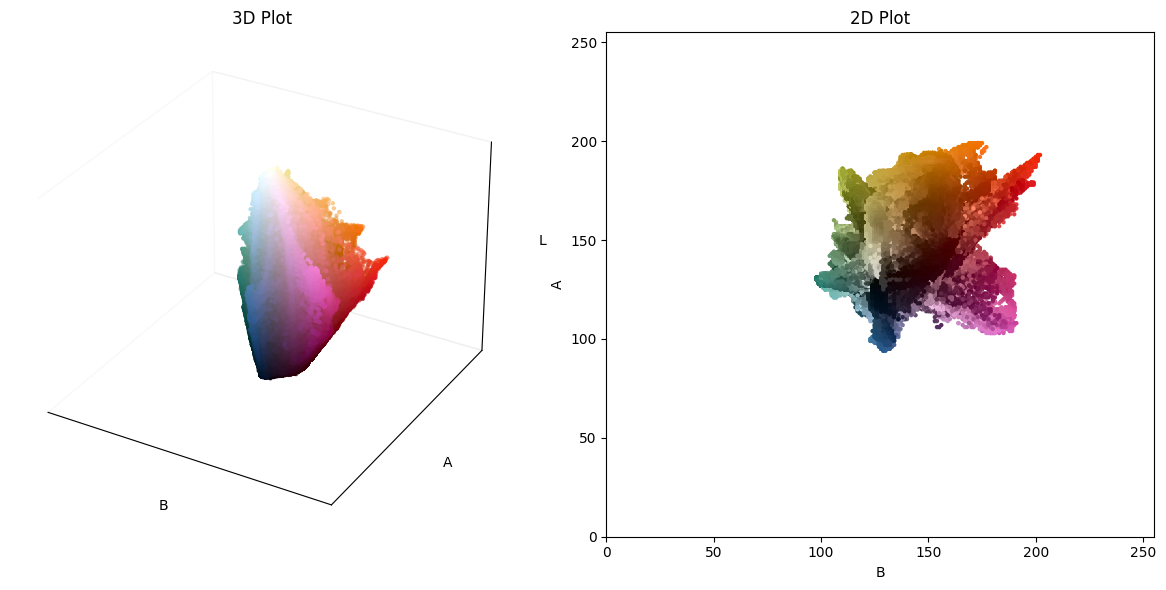

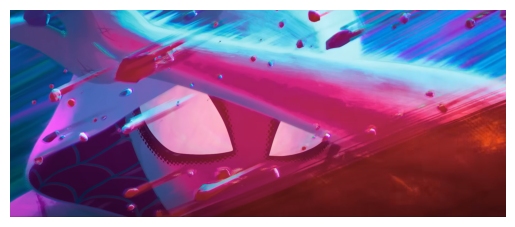

In [ ]:
ima.to_lab_images(image_list)

## colab에서 파일 받기

In [ ]:
from google.colab import files
!zip -r /content/results.zip /content/results
files.download('/content/results.zip')

## Video 분석

#### 비디오 다운로드 from yt

In [42]:
url = "https://www.youtube.com/watch?v=EbHhQfTvMSA&list=RD2xomWWncop0&index=3"
video_path= ima.download_video_from_yt(url)

In [ ]:
video_list = ima.read_files_from_inputpath(docs_type='video')
# video_path = str(video_list[0])

#### video 분석

In [ ]:
ima.process_video(video_path)

---

In [1]:
from pathlib import Path
from datetime import date


class Analysis:
    def __init__(self,  export_prefix:str="scraper", intput_folder_path = None, output_folder_path=None):
        self.intput_folder:Path
        self.output_folder:Path
        self.output_xlsx_name = None
        self.set_data_path(export_prefix=export_prefix, intput_folder_path=intput_folder_path, output_folder_path=output_folder_path)



    def set_data_path(self,export_prefix:str=None, intput_folder_path:str=None, output_folder_path:str=None):
        if intput_folder_path is not None:
            self.intput_folder = Path(intput_folder_path)  # 폴더 이름을 지정
            if not self.intput_folder.exists():
                self.intput_folder.mkdir(parents=True)

        if output_folder_path is not None:
            self.output_folder = Path(output_folder_path)
            if not self.output_folder.exists():
                self.output_folder.mkdir(parents=True, exist_ok=True)
            if export_prefix is not None:
                self.output_xlsx_name = self.output_folder /  f"{export_prefix}{date.today().strftime('%Y-%m-%d')}.xlsx"
            else:
                self.output_xlsx_name = self.output_folder / f"{date.today().strftime('%Y-%m-%d')}.xlsx"

In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube

class ImgAnalysis(Analysis):
    def __init__(self,
                 export_prefix="text_", intput_folder_path="input", output_folder_path="results"):
        super().__init__(export_prefix=export_prefix, intput_folder_path=intput_folder_path,
                         output_folder_path=output_folder_path)

        # self._set_datapack()

    def read_files_from_inputpath(self, docs_type="img"):

        file_type = {"img": ['.png', '.jpeg'],
                     "video": ['.mp4',]
                     }
        file_list = self.intput_folder.glob('*')

        files = [file for file in file_list if file.suffix in file_type.get(docs_type)]
        return files

    def download_video_from_yt(self, url):
        file_path = None
        yt = YouTube(url)
        print(f"Downloading {yt.title}...")
        for _ in range(10):
            try:
                video_stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by(
                    'resolution').desc().first()
                video_stream.download()
                filename = video_stream.default_filename
                file_path = os.path.join(os.getcwd(), f"{filename}")
                break
            except Exception as e:
                pass

        return file_path

    def to_lab_images(self, image_list):
        for filename in image_list:
            image_path = str(filename)
            title = filename.name.split(".")[0]
            image_BGR = cv2.imread(image_path)
            for _ in range(10):
                try:
                    _ = self.to_lab_image(image=image_BGR, save_title=title, showmode=False)

                    print("=" * 150)
                    break
                except:
                    pass


    def to_lab_image(self, image, input_type='BGR', save_title:str=None, showmode=True):

        if showmode:
            # BGR을 RGB로 변환
            img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.show()

        conversion = cv2.COLOR_BGR2LAB if input_type == 'BGR' else cv2.COLOR_RGB2LAB
        image_LAB = cv2.cvtColor(image, conversion)

        y, x, z = image_LAB.shape
        LAB_flat = np.reshape(image_LAB, [y * x, z])

        colors = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if input_type == 'BGR' else image
        colors = np.reshape(colors, [y * x, z]) / 255.

        l = LAB_flat[:, 0]
        a = LAB_flat[:, 1]
        b = LAB_flat[:, 2]

        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(ys=b, xs=a, zs=l, s=10, c=colors, lw=0)
        ax1.set_xlabel('B')
        ax1.set_ylabel('A')
        ax1.set_zlabel('L')
        ax1.set_xlim([0, 255])
        ax1.set_ylim([0, 255])
        ax1.set_zlim([0, 255])
        ax1.set_title('3D Plot')
        ax1.xaxis.pane.fill = False
        ax1.yaxis.pane.fill = False
        ax1.zaxis.pane.fill = False
        ax1.grid(False)
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.set_zticks([])

        # 두 번째 서브플롯 (2D scatter plot)
        ax2 = fig.add_subplot(122)
        ax2.scatter(y=b, x=a, s=10, c=colors, lw=0)
        ax2.set_xlabel('B')
        ax2.set_ylabel('A')
        ax2.set_xlim([0, 255])
        ax2.set_ylim([0, 255])
        ax2.set_title('2D Plot')

        plt.tight_layout()

        if save_title is not None:
            plt.savefig(os.path.join(self.output_folder, f'{save_title}.png'))

        if showmode:
            plt.show()
            return None
        else: return fig, ax

        # else:
        #     fig = plt.gcf()
        #     fig.canvas.draw()
        #     img_array = np.array(fig.canvas.renderer.buffer_rgba())
        #     return img_array

    def _resize_window(self, window_name, width, height):
        cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        cv2.resizeWindow(window_name, width, height)

    def _extract_color(self, frame, lower_bound, upper_bound):
        color_mask = cv2.inRange(frame, lower_bound, upper_bound)
        color_extraction = cv2.bitwise_and(frame, frame, mask=color_mask)
        return color_extraction

    def process_video(self, video_path, frame_interval=40):
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("Error: Could not open video.")
            exit()

        self._resize_window('Original Video', 800, 600)
        self._resize_window('Gray Video', 800, 600)
        # self._resize_window('Red Extraction', 800, 600)
        # self._resize_window('Green Extraction', 800, 600)
        # self._resize_window('Blue Extraction', 800, 600)
        frame_count = 0
        while True:
            ret, frame = cap.read()

            if not ret:
                break
                
            # 프레임 파일로 저장
            if frame_count % frame_interval == 0:
                frame_filename = os.path.join(self.intput_folder, f'frame_{frame_count:04d}.png')
                cv2.imwrite(frame_filename, frame)
            # 다음 프레임으로 진행
            frame_count += 1
            # red_extraction = self._extract_color(frame, np.array([0, 0, 100]), np.array([100, 100, 255]))
            # green_extraction = self._extract_color(frame, np.array([0, 100, 0]), np.array([100, 255, 100]))
            # blue_extraction = self._extract_color(frame, np.array([100, 0, 0]), np.array([255, 100, 100]))

            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            cv2.imshow('Original Video', frame)
            cv2.imshow('Gray Video', gray_frame)
            # cv2.imshow('Green Extraction', green_extraction)
            # cv2.imshow('Blue Extraction', blue_extraction)

            if cv2.waitKey(25) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()


In [35]:
ima = ImgAnalysis()

In [36]:
video_list = ima.read_files_from_inputpath(docs_type='video')
video_path = str(video_list[0])

In [37]:
ima.process_video(video_path)

In [38]:
image_list = ima.read_files_from_inputpath()
# image_list

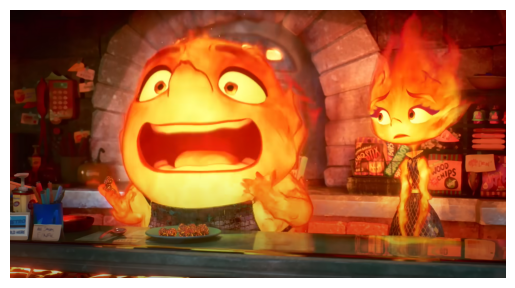

In [ ]:
ima.to_lab_images(image_list)